In [1]:
# Mount google drive
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
# Path of directory
drive_path = "/content/drive/MyDrive"
root_path = f"{drive_path}/master/code-data/mxene_solvent"
solvent_path = f"{drive_path}/master/code-data/solvent"

In [3]:
import pandas as pd

In [4]:
# Load data
df_mx_solvent_data_labeled = pd.read_pickle(f"{root_path}/008_dataset_mx_solvent_using_hsp.pkl")
df_mx_solvent_data_labeled.columns = df_mx_solvent_data_labeled.columns.str.lower()
print(df_mx_solvent_data_labeled.shape)
df_mx_solvent_data_labeled.head()

(653, 63)


,mx,method,solvent,label,inchikey,δd,δp,δh,molarvolume,gap_oh,...,h_bond_donor_count,h_bond_acceptor_count,rotatable_bond_count,heavy_atom_count,isotope_atom_count,atom_stereo_count,bond_stereo_count,covalent_unit_count,boiling_point,mmhg
0,Ti3C2,HF,water,1,XLYOFNOQVPJJNP-UHFFFAOYSA-N,15.5,16.0,42.3,18.0,0.0,...,1,1,0,1,0,0,0,1,373.2,760.0
1,Ti3C2,HF,ethanol,1,LFQSCWFLJHTTHZ-UHFFFAOYSA-N,15.8,8.8,19.4,58.5,0.0,...,1,1,0,3,0,0,0,1,351.5,760.0
2,Ti3C2,HF,methanol,-1,OKKJLVBELUTLKV-UHFFFAOYSA-N,15.1,12.3,22.3,40.7,0.0,...,1,1,0,2,0,0,0,1,337.8,760.0
3,Ti3C2,HF,acetone,-1,CSCPPACGZOOCGX-UHFFFAOYSA-N,15.5,10.4,7.0,74.0,0.0,...,0,1,0,4,0,0,0,1,329.3,760.0
4,Ti3C2,HF,acetonitrile,-1,WEVYAHXRMPXWCK-UHFFFAOYSA-N,15.3,18.0,6.1,52.6,0.0,...,0,1,0,3,0,0,0,1,354.8,760.0


In [5]:
cols_to_keep = [col for col in df_mx_solvent_data_labeled.columns if not (df_mx_solvent_data_labeled[col].nunique() <= 1)]
df_mx_solvent_data_labeled = df_mx_solvent_data_labeled[cols_to_keep]

In [6]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [7]:
df_mx_solvent_data_labeled['method'] = df_mx_solvent_data_labeled['method'].astype('category').cat.codes

In [8]:
df_mx_solvent_data_labeled.head()

,mx,method,solvent,label,inchikey,δd,δp,δh,molarvolume,work_function_oh,...,molecular_weight,xlogp,tpsa,complexity,h_bond_donor_count,h_bond_acceptor_count,rotatable_bond_count,heavy_atom_count,atom_stereo_count,boiling_point
0,Ti3C2,0,water,1,XLYOFNOQVPJJNP-UHFFFAOYSA-N,15.5,16.0,42.3,18.0,1.985656,...,18.015,-0.5,1.0,0.0,1,1,0,1,0,373.2
1,Ti3C2,0,ethanol,1,LFQSCWFLJHTTHZ-UHFFFAOYSA-N,15.8,8.8,19.4,58.5,1.985656,...,46.07,-0.1,20.2,2.8,1,1,0,3,0,351.5
2,Ti3C2,0,methanol,-1,OKKJLVBELUTLKV-UHFFFAOYSA-N,15.1,12.3,22.3,40.7,1.985656,...,32.042,-0.5,20.2,2.0,1,1,0,2,0,337.8
3,Ti3C2,0,acetone,-1,CSCPPACGZOOCGX-UHFFFAOYSA-N,15.5,10.4,7.0,74.0,1.985656,...,58.08,-0.1,17.1,26.3,0,1,0,4,0,329.3
4,Ti3C2,0,acetonitrile,-1,WEVYAHXRMPXWCK-UHFFFAOYSA-N,15.3,18.0,6.1,52.6,1.985656,...,41.05,0.0,23.8,29.3,0,1,0,3,0,354.8


In [9]:
features = ['method', 'δd', 'δp', 'δh', 'molarvolume', 'work_function_oh',
   'formation_energy_oh', 'ehull_oh', 'alphax_el_oh', 'alphay_el_oh', 'alphaz_el_oh',
   'plasmafrequency_x_oh', 'plasmafrequency_y_oh', 'has_inversion_symmetry_oh',
   'gap_o', 'work_function_o', 'formation_energy_o', 'ehull_o',
   'alphax_el_o', 'alphay_el_o', 'alphaz_el_o', 'plasmafrequency_x_o', 'plasmafrequency_y_o',
   'has_inversion_symmetry_o', 'work_function_f',
   'formation_energy_f', 'ehull_f', 'alphax_el_f', 'alphay_el_f', 'alphaz_el_f', 'plasmafrequency_x_f',
   'plasmafrequency_y_f', 'has_inversion_symmetry_f',
   'molecular_weight', 'xlogp', 'tpsa', 'complexity', 'h_bond_donor_count', 'h_bond_acceptor_count',
   'rotatable_bond_count', 'heavy_atom_count', 'atom_stereo_count',
   'boiling_point']
X = df_mx_solvent_data_labeled[features]
y = df_mx_solvent_data_labeled['label']

In [10]:
X.head()

,method,δd,δp,δh,molarvolume,work_function_oh,formation_energy_oh,ehull_oh,alphax_el_oh,alphay_el_oh,...,molecular_weight,xlogp,tpsa,complexity,h_bond_donor_count,h_bond_acceptor_count,rotatable_bond_count,heavy_atom_count,atom_stereo_count,boiling_point
0,0,15.5,16.0,42.3,18.0,1.985656,-1.294839,0.123329,32.369286,32.369286,...,18.015,-0.5,1.0,0.0,1,1,0,1,0,373.2
1,0,15.8,8.8,19.4,58.5,1.985656,-1.294839,0.123329,32.369286,32.369286,...,46.07,-0.1,20.2,2.8,1,1,0,3,0,351.5
2,0,15.1,12.3,22.3,40.7,1.985656,-1.294839,0.123329,32.369286,32.369286,...,32.042,-0.5,20.2,2.0,1,1,0,2,0,337.8
3,0,15.5,10.4,7.0,74.0,1.985656,-1.294839,0.123329,32.369286,32.369286,...,58.08,-0.1,17.1,26.3,0,1,0,4,0,329.3
4,0,15.3,18.0,6.1,52.6,1.985656,-1.294839,0.123329,32.369286,32.369286,...,41.05,0.0,23.8,29.3,0,1,0,3,0,354.8


In [11]:
y.head()

,label
0,1
1,1
2,-1
3,-1
4,-1


In [12]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [13]:
mask_pos = y == 1
mask_neg = y == -1
mask_unlabeled = y == 0


In [14]:
X_train = X_scaled[mask_pos | mask_neg]
y_train = y[mask_pos | mask_neg]

In [15]:
X_test = X_scaled[mask_unlabeled]
df_unlabeled = df_mx_solvent_data_labeled[mask_unlabeled].copy()

In [16]:
clf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=42)

In [17]:
proba_unlabeled = clf.predict_proba(X_test)[:, 1]  # Probability of class 1 (positive)
df_unlabeled['predicted_proba'] = proba_unlabeled
df_unlabeled['predicted_label'] = (proba_unlabeled >= 0.5).astype(int)

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

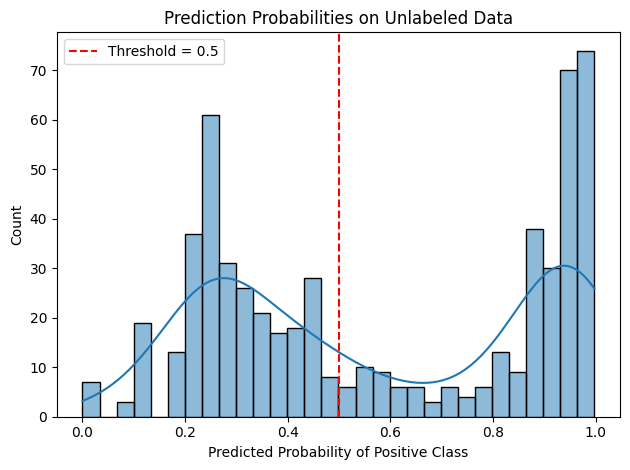

In [19]:
sns.histplot(proba_unlabeled, bins=30, kde=True)
plt.axvline(0.5, color='red', linestyle='--', label='Threshold = 0.5')
plt.title("Prediction Probabilities on Unlabeled Data")
plt.xlabel("Predicted Probability of Positive Class")
plt.ylabel("Count")
plt.legend()
plt.tight_layout()
plt.show()

In [25]:
high_conf = df_unlabeled[df_unlabeled['predicted_proba'] >= 0.9]
top_10 = high_conf.sort_values(by='predicted_proba', ascending=False).head(20)
print(top_10[['solvent', 'mx', 'predicted_proba']])

                    solvent     mx  predicted_proba
587    N-methyl pyrrolidone  Ta4C3         0.997758
588    N-methyl pyrrolidone  Ta4C3         0.997758
509    N-methyl pyrrolidone   V4C3         0.997758
507  N, N-dimethylformamide   V4C3         0.997629
585  N, N-dimethylformamide  Ta4C3         0.997629
193    N-methyl pyrrolidone   V2C1         0.997169
348  N, N-dimethylformamide  Ti2C1         0.997129
191  N, N-dimethylformamide   V2C1         0.997040
269  N, N-dimethylformamide  Mo2C1         0.996540
272    N-methyl pyrrolidone  Mo2C1         0.994862
271    N-methyl pyrrolidone  Mo2C1         0.994862
116     Propylene Carbonate  Nb2C1         0.994167
510     Propylene Carbonate   V4C3         0.994167
117     Propylene Carbonate  Nb2C1         0.994167
511     Propylene Carbonate   V4C3         0.994167
589     Propylene Carbonate  Ta4C3         0.994167
590     Propylene Carbonate  Ta4C3         0.994167
508  N, N-dimethylformamide   V4C3         0.994057
586  N, N-di

In [24]:
low_conf = df_unlabeled[df_unlabeled['predicted_proba'] <= 0.1]
bottom_10 = low_conf.sort_values(by='predicted_proba', ascending=True).head(20)

print("MXene-solvent pairs predicted to NOT work at all (P ≤ 0.1):")
print(bottom_10[['mx', 'solvent', 'predicted_proba']])

MXene-solvent pairs predicted to NOT work at all (P ≤ 0.1):
        mx             solvent  predicted_proba
84   Ti3C2            p-Xylene         0.000000
83   Ti3C2         Cyclohexane         0.000000
82   Ti3C2  1,1-Dichloroethane         0.004286
88   Ti3C2          Chloroform         0.004286
87   Ti3C2           n-Heptane         0.011429
86   Ti3C2  Tetrachloromethane         0.011429
98   Ti3C2       Chlorobenzene         0.014762
101  Ti3C2             Styrene         0.080000
79   Ti3C2     Dichloromethane         0.085586
85   Ti3C2       Triethylamine         0.095857


In [ ]:
print("\n=== Summary of predicted probabilities on unlabeled data ===")
print(df_unlabeled['predicted_proba'].describe())

# Count how many samples fall into different confidence zones
bins = [0.0, 0.1, 0.3, 0.5, 0.7, 0.9, 1.0]
labels = ['Very Low (≤0.1)', 'Low (0.1–0.3)', 'Mid (0.3–0.5)',
          'High (0.5–0.7)', 'Very High (0.7–0.9)', 'Extremely High (>0.9)']

df_unlabeled['confidence_bin'] = pd.cut(df_unlabeled['predicted_proba'], bins=bins, labels=labels, include_lowest=True)
print("\n=== Prediction count by confidence bin ===")
print(df_unlabeled['confidence_bin'].value_counts().sort_index())


=== Summary of predicted probabilities on unlabeled data ===
count    579.000000
mean       0.582056
std        0.318485
min        0.000000
25%        0.270000
50%        0.506434
75%        0.929800
max        0.997758
Name: predicted_proba, dtype: float64

=== Prediction count by confidence bin ===
confidence_bin
Very Low (≤0.1)           10
Low (0.1–0.3)            163
Mid (0.3–0.5)            116
High (0.5–0.7)            40
Very High (0.7–0.9)       76
Extremely High (>0.9)    174
Name: count, dtype: int64


In [ ]:
train_path = f"{drive_path}/master/code-data/training/"

In [ ]:
df_unlabeled.to_csv(f"{train_path}/001_positive_vs_negative_predictions_on_unlabeled_rf.csv")
df_unlabeled.to_pickle(f"{train_path}/001_positive_vs_negative_predictions_on_unlabeled_rf.pkl")


                      Feature  Importance
3                          δh    0.156719
42              boiling_point    0.131003
2                          δp    0.114092
34                      xlogp    0.090670
35                       tpsa    0.079659
38      h_bond_acceptor_count    0.067548
4                 molarvolume    0.062158
36                 complexity    0.060340
1                          δd    0.057835
37         h_bond_donor_count    0.037890
33           molecular_weight    0.034907
40           heavy_atom_count    0.027903
0                      method    0.007697
39       rotatable_bond_count    0.006384
41          atom_stereo_count    0.006033
12       plasmafrequency_y_oh    0.005427
21        plasmafrequency_x_o    0.004672
8                alphax_el_oh    0.004178
7                    ehull_oh    0.004166
11       plasmafrequency_x_oh    0.003864
31        plasmafrequency_y_f    0.003770
23   has_inversion_symmetry_o    0.003338
10               alphaz_el_oh    0

/tmp/ipython-input-29-4016910764.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='viridis')


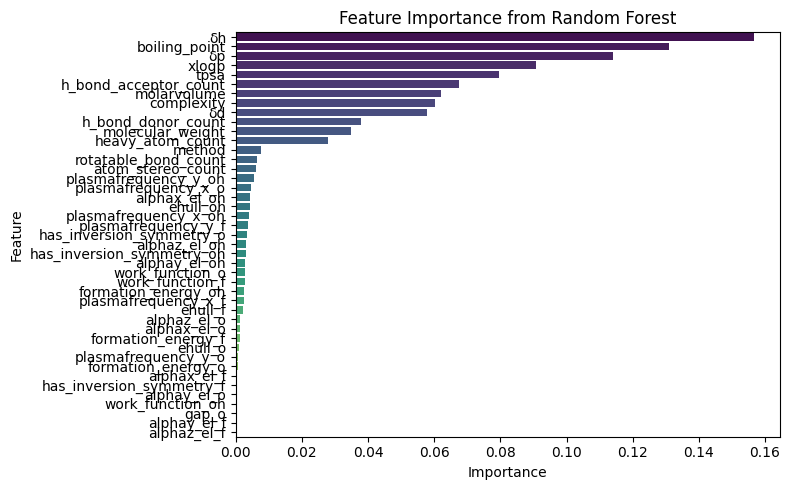

In [ ]:
importances = clf.feature_importances_
feature_names = features

# Create a DataFrame for better visualization
feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feat_imp_df)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='viridis')
plt.title('Feature Importance from Random Forest')
plt.tight_layout()
plt.show()

Top 10 Feature Importances:
                  Feature  Importance
3                      δh    0.156719
42          boiling_point    0.131003
2                      δp    0.114092
34                  xlogp    0.090670
35                   tpsa    0.079659
38  h_bond_acceptor_count    0.067548
4             molarvolume    0.062158
36             complexity    0.060340
1                      δd    0.057835
37     h_bond_donor_count    0.037890


/tmp/ipython-input-30-2139369391.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='mako')


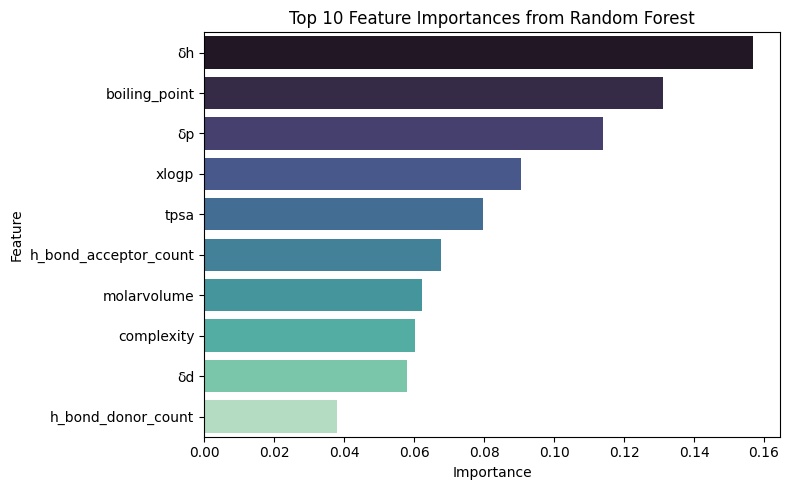

In [ ]:

# Create and sort feature importance DataFrame
feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False).head(10)  # Change to .head(15) for top 15

# Print top features
print("Top 10 Feature Importances:")
print(feat_imp_df)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='mako')
plt.title('Top 10 Feature Importances from Random Forest')
plt.tight_layout()
plt.show()